In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Step 1: Read the Dataset
df = pd.read_csv('/content/drive/MyDrive/sem 8/DL/Datasets/placementdataset.csv')

In [ ]:
df.head()

,CGPA,Profile_Score,Placed
0,8.5,9.0,1
1,7.8,8.2,1
2,9.3,9.5,1
3,6.9,7.1,0
4,7.2,6.8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CGPA           100 non-null    float64
 1   Profile_Score  100 non-null    float64
 2   Placed         100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.duplicated().sum()

7

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(93, 3)

In [ ]:
# Separate features (X) and target variable (y)
X = df[['CGPA', 'Profile_Score']]
y = df['Placed']


In [ ]:
X.head()

,CGPA,Profile_Score
0,8.5,9.0
1,7.8,8.2
2,9.3,9.5
3,6.9,7.1
4,7.2,6.8


In [ ]:
y


0     1
1     1
2     1
3     0
4     0
     ..
94    0
95    0
96    1
97    0
98    0
Name: Placed, Length: 93, dtype: int64

In [ ]:
# Step 2: Build the Neural Network Model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) # Input layer with 2 neurons
model.add(Dense(4, activation='relu')) # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.44741583, -0.43137813, -0.82440925,  0.832407  ],
        [-0.00571537, -0.64366317,  0.5158541 , -0.6224859 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.7573778 , -0.1118921 ,  0.5338238 ,  0.74574345],
        [-0.30478293,  0.51895696, -0.05755907,  0.15408188],
        [ 0.51521534, -0.8301885 ,  0.67376584,  0.05203867],
        [ 0.59218735,  0.35199875, -0.46249384,  0.142371  ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.14829749],
        [-0.44404203],
        [-0.5087815 ],
        [-0.65386546]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 3: Train the Model
history = model.fit(X, y, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
93/93 [==============================] - 1s 1ms/step - loss: 0.7586 - accuracy: 0.4194
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.3548
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4731
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5806
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5806
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5806
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5806
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5806
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5806
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5806
Epoch 11/

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3/3 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7419
Loss: 0.5545839071273804, Accuracy: 0.7419354915618896


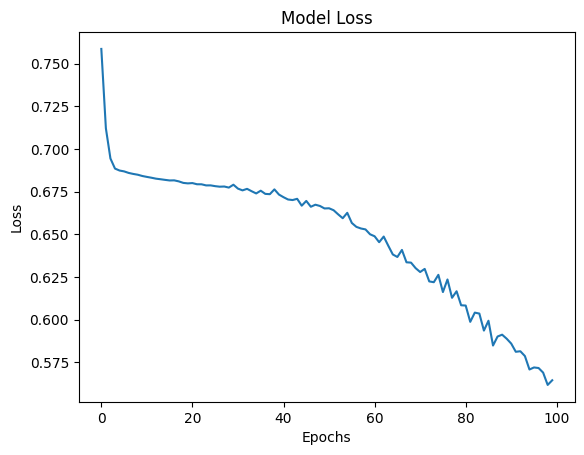

In [ ]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


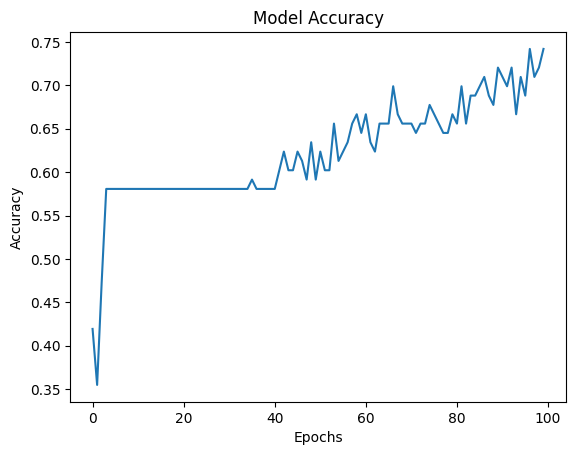

In [ ]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Get the weights and biases of all layers
weights_biases = []
for layer in model.layers:
 weights_biases.append(layer.get_weights())

In [ ]:
# Print the weights and biases of each layer
for i, (weights, biases) in enumerate(weights_biases):
  print(f"Layer {i + 1} Weights:")
  print(weights)
  print(f"Layer {i + 1} Biases:")
  print(biases)

Layer 1 Weights:
[[-0.44741583 -0.43137813 -0.82440925  0.69436634]
 [-0.00571537 -0.64366317  0.5158541  -0.77199596]]
Layer 1 Biases:
[0.        0.        0.        0.8416887]
Layer 2 Weights:
[[ 0.7573778  -0.1118921   0.5338238   0.74574345]
 [-0.30478293  0.51895696 -0.05755907  0.15408188]
 [ 0.51521534 -0.8301885   0.67376584  0.05203867]
 [ 1.6169292   1.2857666  -0.46249384  0.48307848]]
Layer 2 Biases:
[-0.00082797 -0.00040075  0.         -0.00107745]
Layer 3 Weights:
[[-1.0490447]
 [-1.370959 ]
 [-0.5087815]
 [-0.9375921]]
Layer 3 Biases:
[0.7645978]


In [ ]:
#predict for new data using our model
import numpy as np
new_data = np.array([[8.1, 6.1]])
prediction = model.predict(new_data)

1/1 [==============================] - 0s 113ms/step


In [ ]:
prediction

array([[0.00222514]], dtype=float32)

In [ ]:
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)

Prediction: [[0]]


In [ ]:
new_data = np.array([[4.1, 7.1]])
prediction = model.predict(new_data)
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)


1/1 [==============================] - 0s 21ms/step
Prediction: [[1]]
